In [4]:
import numpy as np
import pandas as pd 

df_desc=pd.read_csv("./seek_jobs_2025-04-15_23-09-09.csv")

df_desc
# sending a  linkedin message and seeting up a cron job for a message only once 

,search_term,title,company,location,salary,date_posted,url,description
0,software engineer,Graduate Software Engineer,NaN,Brisbane QLD,NaN,22h ago,https://www.seek.com.au/job/83543437?type=stan...,The Opportunity\n\nWe are a seeking talented G...
1,software engineer,Software Developer,NaN,Brisbane QLD,"$80,000 – $100,000 per year",7d ago,https://www.seek.com.au/job/83358603?type=stan...,Join the revolution in workforce management.\n...
2,software engineer,Senior Software Engineer,NaN,Brisbane QLD,"$130,000 – $170,000 per year",4d ago,https://www.seek.com.au/job/83478071?type=stan...,"Our client, a Brisbane based software product ..."
3,software engineer,Software Developer,NaN,Brisbane QLD,NaN,11d ago,https://www.seek.com.au/job/83279522?type=stan...,We are Metro South Health\n\nWe are the major ...
4,software engineer,Software Engineer,NaN,Brisbane QLD,Strong Salary + Benefits,25d ago,https://www.seek.com.au/job/82965105?type=stan...,Global Software Company\nHybrid (Brisbane CBD ...
...,...,...,...,...,...,...,...,...
262,software engineer,Senior Associate Digital Consultant,NaN,Brisbane QLD,NaN,10d ago,https://www.seek.com.au/job/83304646?type=stan...,Your impact\n\nAs technology continues to adva...
263,software engineer,Senior Android Developer (Brisbane),NaN,Brisbane QLD,NaN,27d ago,https://www.seek.com.au/job/82897402?type=stan...,"About us\n\nTrideca is a strategy, data and di..."
264,software engineer,Senior Frontend Engineer - Video AI,NaN,Brisbane QLD,NaN,14d ago,https://www.seek.com.au/job/83209405?type=stan...,What you’d be doing in this role\n\nAs Canva s...
265,software engineer,D365 FinOps Senior developer,NaN,Eight Mile Plains,NaN,18d ago,https://www.seek.com.au/job/83144590?type=stan...,Dynamics 365 Finance & Operations Developer\n\...


In [5]:
def print_full_desc(desc):
    with pd.option_context('display.max_colwidth',None):
      print(desc)
        
print_full_desc(df_desc['description'].iloc[:2]);

0    The Opportunity\n\nWe are a seeking talented Graduate Software Engineers to join the Boeing Defence Australia Graduate Program in Brisbane. This program offers graduates a permanent full-time position, providing a solid career foundation from day one.\n\nGraduate opportunities are across a range of engineering business units at Boeing which include:\n\nE-7A Wedgetail - The centrepiece of Australia's national air defence capability, incorporating powerful airborne surveillance, communications and battle management capability.\nMQ-28 Ghost Bat - Development and integration of mission systems for uncrewed teaming aircraft designed to be a force multiplier in support of advanced multi-mission air combat operations.\nSustainment Operations - Maintenance, repair, overhaul and upgrades of military aircraft including F/A-18F Super Hornets, CH-47F Chinooks and P-8A Poseidons, as well as training design and delivery.\nJoint Systems - Design, development and sustainment of defence communicat

In [6]:
x=df_desc["title"]
x.unique()

array(['Graduate Software Engineer', 'Software Developer',
       'Senior Software Engineer', 'Software Engineer',
       'Multiple Software Engineers',
       'Full Stack Software Engineer, South Bank - QLD',
       'Software Engineer – Cloud and AI Development',
       'Principal Software Engineer',
       'Senior Software Developer C# (WFH)',
       'Senior .NET Software Engineer', 'Senior Software Developer',
       'Full Stack Developer', 'Science Systems Developer',
       'Senior Software Engineer | Golang', 'Junior Full-Stack Developer',
       'IT Developer',
       'Software Developer – .NET / Angular | Purpose-Driven SaaS | Remote-First',
       'Deployment Engineer – IT Hardware & Software Rollout',
       'Software Quality Assurance Engineer',
       'Senior Software Engineer - Front End',
       'Software Engineer - Golang - Permanent',
       'Junior Full Stack Developer', 'Software Engineer (Full Stack)',
       'Senior Full Stack Software Engineer', 'Software Engineer 

In [7]:
x.value_counts().head(25)


title
Senior Software Engineer                               10
Software Engineer                                       8
Software Developer                                      4
.Net Developer                                          4
Full Stack Developer                                    3
Technical Lead                                          3
Java Application Developer                              2
Software Engineer - C++                                 2
Programmer Analyst - 3DX                                2
Firmware Engineer                                       2
Developer                                               2
Machine Learning Specialist                             2
Senior Software Developer                               2
Java Developer                                          2
Technical Lead (AI-Focused)                             2
ServiceNow Developer                                    2
EY 2026 Graduate Design Computing Program               2
D365 CE 

## 1.  EDA

In [8]:
# Basic summary of the DataFrame

print(df_desc.info())


duplicates = df_desc.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   search_term  267 non-null    object
 1   title        267 non-null    object
 2   company      2 non-null      object
 3   location     267 non-null    object
 4   salary       94 non-null     object
 5   date_posted  267 non-null    object
 6   url          267 non-null    object
 7   description  267 non-null    object
dtypes: object(8)
memory usage: 16.8+ KB
None
Number of duplicate rows: 0


In [9]:
# Remove duplicates 
df_desc = df_desc.drop_duplicates()
duplicates = df_desc.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [10]:
#
import re
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation 
    text = re.sub(r',', '', text)
    # # Remove extra spaces
    text = re.sub(r'\n+', ' ', text).strip()
    return text

#  # Define mappings for known variations
def standardize_skills(text):
    mappings = {
        # only using clean terms for skill filter
        'c#' :'csharp',
        'C#':'csharp' ,
        'SQL':'sql',
       ' Postgre SQL':'postgresql',  
    'PostgreSql':'postgresql',
    'PostGresql':'postgresql',
        	'Power BI':'powerbi',
        'Power BI':'powerbi',
          # known misses , will circle back and change if any
        'C++':'cpp',
        'React':'react'
       #  'C':' c ',
        
    }
    for variation, standard in mappings.items():
        text = text.replace(variation, standard)
    return text



In [11]:


# # # Apply standardization on relevant text columns
if 'description' in df_desc.columns:
    df_desc['description'] = df_desc['description'] .apply(standardize_skills).apply(clean_text)


print_full_desc(df_desc['description'].iloc[:1])

0    the opportunity we are a seeking talented graduate software engineers to join the boeing defence australia graduate program in brisbane. this program offers graduates a permanent full-time position providing a solid career foundation from day one. graduate opportunities are across a range of engineering business units at boeing which include: e-7a wedgetail - the centrepiece of australia's national air defence capability incorporating powerful airborne surveillance communications and battle management capability. mq-28 ghost bat - development and integration of mission systems for uncrewed teaming aircraft designed to be a force multiplier in support of advanced multi-mission air combat operations. sustainment operations - maintenance repair overhaul and upgrades of military aircraft including f/a-18f super hornets ch-47f chinooks and p-8a poseidons as well as training design and delivery. joint systems - design development and sustainment of defence communications systems and net

In [12]:
# df_desc

In [13]:
print(df_desc.info())

#  text length 
df_desc['description_length'] = df_desc['description'].apply(len)
print(df_desc['description_length'].describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   search_term  267 non-null    object
 1   title        267 non-null    object
 2   company      2 non-null      object
 3   location     267 non-null    object
 4   salary       94 non-null     object
 5   date_posted  267 non-null    object
 6   url          267 non-null    object
 7   description  267 non-null    object
dtypes: object(8)
memory usage: 16.8+ KB
None
count     267.000000
mean     3305.056180
std      1394.575547
min       821.000000
25%      2141.000000
50%      3240.000000
75%      4159.000000
max      7286.000000
Name: description_length, dtype: float64


In [14]:
skills = ['python','javascript','sql','java',
          'aws','azure',
          'dax','powerbi','gcp',
          'tableau','pyspark','api',
          'gis','csharp','cpp','react'
         
         
         ]


skill_counts = {skill: 0 for skill in skills}

for description in df_desc['description']:
    # for text
    for skill in skills:
        if skill in description:
            skill_counts[skill]+=1

print("Skill Counts using manual matching:")
print(skill_counts)


Skill Counts using manual matching:
{'python': 52, 'javascript': 57, 'sql': 71, 'java': 83, 'aws': 93, 'azure': 67, 'dax': 0, 'powerbi': 11, 'gcp': 12, 'tableau': 0, 'pyspark': 2, 'api': 134, 'gis': 20, 'csharp': 52, 'cpp': 18, 'react': 73}


In [15]:
"""
use regular expression to check the word embeddings matches correctly
"""

     # Create a regex pattern that matches  preceding and following word.
        #   (?:\b(\w+)\s+)?    --> captures a preceding word (group 1) word boundary and ends in a white space.
        #   re.escape(skill)   --> Matches the skill exactly .
        #   (?:\s+(\w+)\b)?    --> captures the following word (group 2) that starts with whitespace , ends in boundary space .

import re
def extract_skills(description,skills):
    
    results = []
    # for skill in skills:
    #     pattern = r'(?:\b(\w+)\s+)?' + re.escape(skill) + r'(?:\s+(\w+)\b)?'     
    #     for match in re.finditer(pattern, description, flags=re.IGNORECASE):  #text is previously set to lower case
    #         before = match.group(1)        
    #         after = match.group(2) 
    #         # If the regex term  is in  actually a skill, null it out
    #         # if before in skills   or   after in skills:
    #         #     # if (before in skills) and (after in skills) :
    #         #         before = after = None

    #         # before =None if before in skills else before
    #         # after = None if after in skills else after
    #         if (before or after )!= None:
    #             if (before and after) != None:
    #                 results.append((before, skill, after))


 
    # Loop over each skill.
    for skill in skills:
        # Build a regex that matches the skill as a full word.
        pattern = re.compile(r'\b' + re.escape(skill) + r'\b', flags=re.IGNORECASE)
        for match in pattern.finditer(description):
            start, end = match.span()  # Get start and end indices of the match.
            
            # Extract the text before and after the match.
            before_text = description[:start].strip()
            after_text = description[end:].strip()
            
            # Use a simple regex to split the text into words.
            before_words = re.findall(r'\b\w+\b', before_text)
            after_words = re.findall(r'\b\w+\b', after_text)
            
            # expand term to get context.
            context_before = before_words[-5:] if before_words else []
            context_after = after_words[:5] if after_words else []

          
            results.append((context_before, skill, context_after))
    return results
    
            
df_desc['skills']=df_desc['description'].apply(lambda desc:extract_skills(desc, skills))
    # for description in df_desc['description']:
    #     df_desc['skills']=df_desc['description'].apply(extract_skills(description, skills))
    
print_full_desc(df_desc['skills'].iloc[1:2])
print_full_desc(df_desc['description'].iloc[1:2])


1    [([mysql, restful, apis, supporting, services], aws, [ec2, aurora, elasticache, waf, albs]), ([environments, our, tech, stack, vuejs], react, [native, es6, sass, storybook, cypress])]
Name: skills, dtype: object
1    join the revolution in workforce management. foundu is australian-grown and managed home to 70+ passionate people who are committed to accelerating the success of australian businesses. we've created a platform that streamlines recruitment onboarding rostering timesheet management payroll and reporting for a seamless experience. we’re in the business of building things most people haven’t thought of yet. the pace is fast and the work is challenging. we dream big and we fight hard for customer ease. as a software developer you will be responsible for designing developing and implementing foundu software enabling our clients to keep step with the ever-changing digital landscape.  in this role you will: assist senior software developers with all aspects of software desig

In [16]:
df_desc['skills'].isna().sum()

np.int64(0)

In [17]:
df_desc

,search_term,title,company,location,salary,date_posted,url,description,description_length,skills
0,software engineer,Graduate Software Engineer,NaN,Brisbane QLD,NaN,22h ago,https://www.seek.com.au/job/83543437?type=stan...,the opportunity we are a seeking talented grad...,4336,[]
1,software engineer,Software Developer,NaN,Brisbane QLD,"$80,000 – $100,000 per year",7d ago,https://www.seek.com.au/job/83358603?type=stan...,join the revolution in workforce management. f...,4218,"[([mysql, restful, apis, supporting, services]..."
2,software engineer,Senior Software Engineer,NaN,Brisbane QLD,"$130,000 – $170,000 per year",4d ago,https://www.seek.com.au/job/83478071?type=stan...,our client a brisbane based software product s...,1316,"[([engineers, their, tech, stack, is], python,..."
3,software engineer,Software Developer,NaN,Brisbane QLD,NaN,11d ago,https://www.seek.com.au/job/83279522?type=stan...,we are metro south health we are the major pub...,3340,[]
4,software engineer,Software Engineer,NaN,Brisbane QLD,Strong Salary + Benefits,25d ago,https://www.seek.com.au/job/82965105?type=stan...,global software company hybrid (brisbane cbd 3...,1112,"[([offering, strong, commercial, experience, w..."
...,...,...,...,...,...,...,...,...,...,...
262,software engineer,Senior Associate Digital Consultant,NaN,Brisbane QLD,NaN,10d ago,https://www.seek.com.au/job/83304646?type=stan...,your impact as technology continues to advance...,7013,"[([intermediate, knowledge, of, blueprints, or..."
263,software engineer,Senior Android Developer (Brisbane),NaN,Brisbane QLD,NaN,27d ago,https://www.seek.com.au/job/82897402?type=stan...,about us trideca is a strategy data and digita...,6612,"[([android, development, experience, kotlin, a..."
264,software engineer,Senior Frontend Engineer - Video AI,NaN,Brisbane QLD,NaN,14d ago,https://www.seek.com.au/job/83209405?type=stan...,what you’d be doing in this role as canva scal...,6527,"[([the, company, requirements, proficient, in]..."
265,software engineer,D365 FinOps Senior developer,NaN,Eight Mile Plains,NaN,18d ago,https://www.seek.com.au/job/83144590?type=stan...,dynamics 365 finance & operations developer jo...,5350,"[([power, apps, dataverse, expertise, in], azu..."


In [18]:
df_desc['location'].isna().count()

np.int64(267)

In [19]:
filter_df= df_desc[df_desc['salary'].notna()]
for title, location, salary in filter_df[['title','location','salary']].values:
    print ( title , location, salary)
    
# filter_df= df_desc     
filter_df.count()
filter_df

Software Developer Brisbane QLD $80,000 – $100,000 per year
Senior Software Engineer Brisbane QLD $130,000 – $170,000 per year
Software Engineer Brisbane QLD Strong Salary + Benefits
Senior Software Engineer Brisbane QLD Base + 14% super
Software Engineer Brisbane QLD Permanent Roles. Annual Bonus.
Software Engineer – Cloud and AI Development Kelvin Grove $75,000 – $85,000 per year
Software Developer Brisbane QLD Negotiable package offered to the right applicant.
Principal Software Engineer Brisbane QLD Rate negotiable dependent on experience
Senior Software Developer C# (WFH) Brisbane QLD $130,000 – $140,000 per year
Senior .NET Software Engineer Brisbane QLD $140,000 – $160,000 incl Super
Full Stack Developer Brisbane QLD $850 - $915 p.d.
Senior Software Developer Brisbane QLD $115,758 - $123,611 per annum
Science Systems Developer Dutton Park $99,348 - $108,192 p.a.
Junior Full-Stack Developer Brisbane QLD $70,000 – $90,000 per year
IT Developer Brisbane QLD $55 – $65 per hour
Softw

,search_term,title,company,location,salary,date_posted,url,description,description_length,skills
1,software engineer,Software Developer,NaN,Brisbane QLD,"$80,000 – $100,000 per year",7d ago,https://www.seek.com.au/job/83358603?type=stan...,join the revolution in workforce management. f...,4218,"[([mysql, restful, apis, supporting, services]..."
2,software engineer,Senior Software Engineer,NaN,Brisbane QLD,"$130,000 – $170,000 per year",4d ago,https://www.seek.com.au/job/83478071?type=stan...,our client a brisbane based software product s...,1316,"[([engineers, their, tech, stack, is], python,..."
4,software engineer,Software Engineer,NaN,Brisbane QLD,Strong Salary + Benefits,25d ago,https://www.seek.com.au/job/82965105?type=stan...,global software company hybrid (brisbane cbd 3...,1112,"[([offering, strong, commercial, experience, w..."
5,software engineer,Senior Software Engineer,NaN,Brisbane QLD,Base + 14% super,3d ago,https://www.seek.com.au/job/83499226?type=stan...,take hold of a monster opportunity as a senior...,4165,[]
8,software engineer,Software Engineer,NaN,Brisbane QLD,Permanent Roles. Annual Bonus.,11d ago,https://www.seek.com.au/job/83278998?type=stan...,the opportunity we are looking for software en...,3647,"[([and, open, source, package, knowledge], pyt..."
...,...,...,...,...,...,...,...,...,...,...
209,software engineer,Machine Learning Specialist,NaN,Brisbane QLD,$850 - $1300 p.d.,19d ago,https://www.seek.com.au/job/83095349?type=stan...,are you ready to shape the future of ai in the...,2563,[]
217,software engineer,Mechatronics Engineer,NaN,Brisbane QLD,$110k - $150k p.a.,25d ago,https://www.seek.com.au/job/82947792?type=stan...,randstad has partnered with a leading innovati...,2045,"[([build, and, commission, products, utilise],..."
218,software engineer,PowerPlatform Developer,NaN,Brisbane QLD,$100 - $105 p.h. + + Super Pending Experience,28d ago,https://www.seek.com.au/job/82861944?type=stan...,this pay rate is inclusive of mandatory 25% ca...,2912,"[([agile, methodologies, and, experience, usin..."
228,software engineer,Senior D365 CE CRM Developer (Brisbane Based),NaN,Brisbane QLD,$850 - $950 p.d. + plus super a day,22d ago,https://www.seek.com.au/job/83005507?type=stan...,location: brisbane southern suburb (hybrid - m...,2026,"[([strong, proficiency, in, csharp, net], java..."


In [20]:
filter_df.columns

Index(['search_term', 'title', 'company', 'location', 'salary', 'date_posted',
       'url', 'description', 'description_length', 'skills'],
      dtype='object')

In [21]:
for index, row in filter_df[['title','location', 'salary','skills']].iterrows():
    print(index,print_full_desc(row))



title                                                                                                                                                                            Software Developer
location                                                                                                                                                                               Brisbane QLD
salary                                                                                                                                                                  $80,000 – $100,000 per year
skills      [([mysql, restful, apis, supporting, services], aws, [ec2, aurora, elasticache, waf, albs]), ([environments, our, tech, stack, vuejs], react, [native, es6, sass, storybook, cypress])]
Name: 1, dtype: object
1 None
title                                                                                                                                                                                     

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# # Combine for comparing title with skills, but reduces  
# df_desc['combined_text'] = df_desc[['description', 'title']].fillna('').apply(lambda x: ' '.join(x), axis=1)

# Initialize CountVectorizer to list of skills
vectorizer = CountVectorizer(vocabulary=skills)
skill_matrix = vectorizer.fit_transform(df_desc['description'])
# print(skill_matrix)

# Sum over rows to get total counts per skill
skill_counts_cv = skill_matrix.toarray().sum(axis=0)
skill_counts_cv_dict = dict(zip(vectorizer.get_feature_names_out(), skill_counts_cv))

# print(skill_counts_cv, skill_matrix)
print("Skill Counts using CountVectorizer:")
print(skill_counts_cv_dict)



Skill Counts using CountVectorizer:
{'python': np.int64(75), 'javascript': np.int64(72), 'sql': np.int64(88), 'java': np.int64(73), 'aws': np.int64(151), 'azure': np.int64(197), 'dax': np.int64(0), 'powerbi': np.int64(16), 'gcp': np.int64(18), 'tableau': np.int64(0), 'pyspark': np.int64(3), 'api': np.int64(98), 'gis': np.int64(2), 'csharp': np.int64(65), 'cpp': np.int64(26), 'react': np.int64(123)}


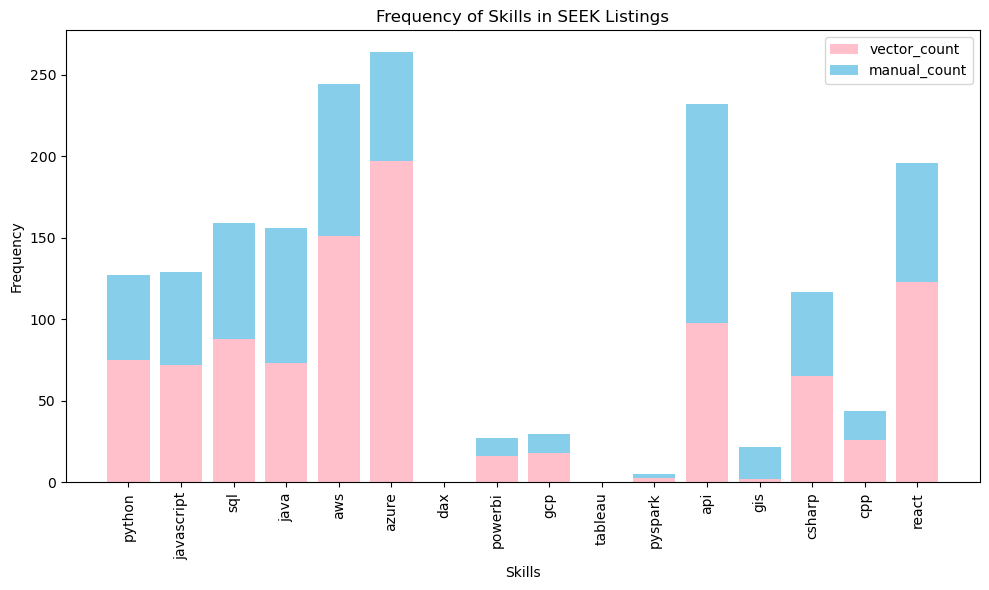

In [23]:
import matplotlib.pyplot as plt

# manual check vs tf_vector
vector_count = skill_counts_cv_dict  
manual_count= skill_counts
# plot=zip(vector_counts,manual_count)
#  bar chart
plt.figure(figsize=(10, 6))
plt.bar(list(vector_count.keys()),list(vector_count.values()),label= 'vector_count' ,color='pink',)
plt.bar(list(manual_count.keys()), list(manual_count.values()),bottom= list(vector_count.values()),label ='manual_count', color='skyblue')

plt.legend()
plt.xlabel('Skills')
plt.xticks(list(vector_count.keys()),rotation=90)
plt.ylabel('Frequency')
plt.title('Frequency of Skills in SEEK Listings')
plt.tight_layout()
plt.show()


# MAPPING

In [24]:
!pip install geopy
!pip install folium
from geopy.geocoders import Nominatim
import folium

# # Initialize geocoder with a traditional user-agent string.
# geolocator = Nominatim(user_agent="your_app_name")

# for loc in filter_df['location']:
#     loc.str.strip()
# location = geolocator.geocode(loc)
# if location is None:
#     raise ValueError("Geocoding failed; check the place name for accuracy.")

# print(f"Address: {location.address}")
# print(f"Latitude: {location.latitude}, Longitude: {location.longitude}")

# # Create a map centered at the location.
# map_object = folium.Map(location=[location.latitude, location.longitude], zoom_start=12)
# # Add a marker.
# folium.Marker(location=[location.latitude, location.longitude], popup=location.address).add_to(map_object)

# # Save the map to an HTML file.
# # map_object.save("map.html")
# # print("Map saved as 'map.html'. Open it in your browser to view the location.")


In [25]:
import pandas as pd
from geopy.geocoders import Nominatim
# import time

# Assume your DataFrame is already loaded as filter_df and has a column named 'location'
# Clean extra spaces in the column names and the values
cfilter_df = filter_df.copy()
cfilter_df['location'] = cfilter_df['location'].str.strip()

print(cfilter_df['location'])

1      Brisbane QLD
2      Brisbane QLD
4      Brisbane QLD
5      Brisbane QLD
8      Brisbane QLD
           ...     
209    Brisbane QLD
217    Brisbane QLD
218    Brisbane QLD
228    Brisbane QLD
237    Brisbane QLD
Name: location, Length: 94, dtype: object


In [26]:

geolocator = Nominatim(user_agent="test")

#  function to get coordinates for each location string.
def geocode_location(place):
    
    # sleep 1 sec for each acknowledgement
    # time.sleep(1)
    loc = geolocator.geocode(place)
    if loc:
        return (loc.latitude, loc.longitude)
    else:
        return (None, None)

In [27]:
# Apply the function to the 'location' Series.
# This will return a Series of (latitude, longitude) tuples.
filter_df['coords'] = cfilter_df['location'].apply(geocode_location)


/tmp/ipykernel_335/815635165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df['coords'] = cfilter_df['location'].apply(geocode_location)


In [28]:
filter_df

,search_term,title,company,location,salary,date_posted,url,description,description_length,skills,coords
1,software engineer,Software Developer,NaN,Brisbane QLD,"$80,000 – $100,000 per year",7d ago,https://www.seek.com.au/job/83358603?type=stan...,join the revolution in workforce management. f...,4218,"[([mysql, restful, apis, supporting, services]...","(-27.4689682, 153.0234991)"
2,software engineer,Senior Software Engineer,NaN,Brisbane QLD,"$130,000 – $170,000 per year",4d ago,https://www.seek.com.au/job/83478071?type=stan...,our client a brisbane based software product s...,1316,"[([engineers, their, tech, stack, is], python,...","(-27.4689682, 153.0234991)"
4,software engineer,Software Engineer,NaN,Brisbane QLD,Strong Salary + Benefits,25d ago,https://www.seek.com.au/job/82965105?type=stan...,global software company hybrid (brisbane cbd 3...,1112,"[([offering, strong, commercial, experience, w...","(-27.4689682, 153.0234991)"
5,software engineer,Senior Software Engineer,NaN,Brisbane QLD,Base + 14% super,3d ago,https://www.seek.com.au/job/83499226?type=stan...,take hold of a monster opportunity as a senior...,4165,[],"(-27.4689682, 153.0234991)"
8,software engineer,Software Engineer,NaN,Brisbane QLD,Permanent Roles. Annual Bonus.,11d ago,https://www.seek.com.au/job/83278998?type=stan...,the opportunity we are looking for software en...,3647,"[([and, open, source, package, knowledge], pyt...","(-27.4689682, 153.0234991)"
...,...,...,...,...,...,...,...,...,...,...,...
209,software engineer,Machine Learning Specialist,NaN,Brisbane QLD,$850 - $1300 p.d.,19d ago,https://www.seek.com.au/job/83095349?type=stan...,are you ready to shape the future of ai in the...,2563,[],"(-27.4689682, 153.0234991)"
217,software engineer,Mechatronics Engineer,NaN,Brisbane QLD,$110k - $150k p.a.,25d ago,https://www.seek.com.au/job/82947792?type=stan...,randstad has partnered with a leading innovati...,2045,"[([build, and, commission, products, utilise],...","(-27.4689682, 153.0234991)"
218,software engineer,PowerPlatform Developer,NaN,Brisbane QLD,$100 - $105 p.h. + + Super Pending Experience,28d ago,https://www.seek.com.au/job/82861944?type=stan...,this pay rate is inclusive of mandatory 25% ca...,2912,"[([agile, methodologies, and, experience, usin...","(-27.4689682, 153.0234991)"
228,software engineer,Senior D365 CE CRM Developer (Brisbane Based),NaN,Brisbane QLD,$850 - $950 p.d. + plus super a day,22d ago,https://www.seek.com.au/job/83005507?type=stan...,location: brisbane southern suburb (hybrid - m...,2026,"[([strong, proficiency, in, csharp, net], java...","(-27.4689682, 153.0234991)"


In [29]:
# Split the tuple into lat and lon columns.
filter_df['latitude'] = filter_df['coords'].apply(lambda x: x[0])
filter_df['longitude'] = filter_df['coords'].apply(lambda x: x[1])

print(filter_df[['salary','location', 'latitude', 'longitude']])

                                            salary      location   latitude  \
1                      $80,000 – $100,000 per year  Brisbane QLD -27.468968   
2                     $130,000 – $170,000 per year  Brisbane QLD -27.468968   
4                         Strong Salary + Benefits  Brisbane QLD -27.468968   
5                                 Base + 14% super  Brisbane QLD -27.468968   
8                   Permanent Roles. Annual Bonus.  Brisbane QLD -27.468968   
..                                             ...           ...        ...   
209                              $850 - $1300 p.d.  Brisbane QLD -27.468968   
217                             $110k - $150k p.a.  Brisbane QLD -27.468968   
218  $100 - $105 p.h. + + Super Pending Experience  Brisbane QLD -27.468968   
228            $850 - $950 p.d. + plus super a day  Brisbane QLD -27.468968   
237    $175k - $200k Package + Insurance Discounts  Brisbane QLD -27.468968   

      longitude  
1    153.023499  
2    153.023499

/tmp/ipykernel_335/3895772993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df['latitude'] = filter_df['coords'].apply(lambda x: x[0])
/tmp/ipykernel_335/3895772993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df['longitude'] = filter_df['coords'].apply(lambda x: x[1])


In [37]:
# (filter_df['salary'].unique())


# normalise salary

In [43]:
import copy
import folium
from folium.plugins import HeatMap

data=[]
# Create a map. seed the initial display tree
map_object = folium.Map(location=[filter_df['latitude'].iloc[0], filter_df['longitude'].iloc[0]], zoom_start=12)
new_object= copy.deepcopy(map_object)
# iterate through df
for idx, row in filter_df.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    loc_name = row['location']
    job_title=row['title']
    Salary=row['salary']
   
    # popup= job_title, loc_name
    popup= f"<h1>{loc_name}</h1><br/><h2>{job_title}</h2><br/>" #branca 
    # skip if loc is not available
    if pd.notnull(lat) and pd.notnull(lon) :
        folium.Marker(location=[float(lat), float(lon)], popup=popup).add_to(map_object) # force location coords to float
        # data.append([float(lat),float(lon),float(Salary)])
        
        
    else: raise ValueError("null df")
# HeatMap(data=data).add_to(new_object)


In [44]:
%matplotlib inline
map_object

In [ ]:
print(data[0])